In [11]:
# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
# dataset have?
# Ans
import pandas as pd
df=pd.read_excel("flight_price.xlsx")
z=df.ndim
x,y=df.shape
print(f"There are {x} rows and {y} columns are present in this {z} dimesions data set")

There are 10683 rows and 11 columns are present in this 2 dimesions data set


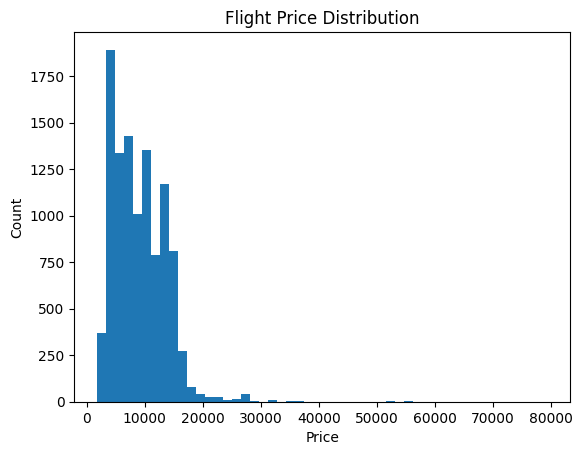

In [14]:
# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
# distribution.
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('flight_price.xlsx')

df = df.dropna(subset=['Price'])

plt.hist(df['Price'], bins=50)
plt.title('Flight Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


In [16]:
# Q3. What is the range of prices in the dataset? What is the minimum and maximum price?
import pandas as pd

df = pd.read_excel('flight_price.xlsx')

df = df.dropna(subset=['Price'])

min_price = df['Price'].min()
max_price = df['Price'].max()

print("Minimum price:", min_price)
print("Maximum price:", max_price)
print("Price range:", max_price - min_price)


Minimum price: 1759
Maximum price: 79512
Price range: 77753


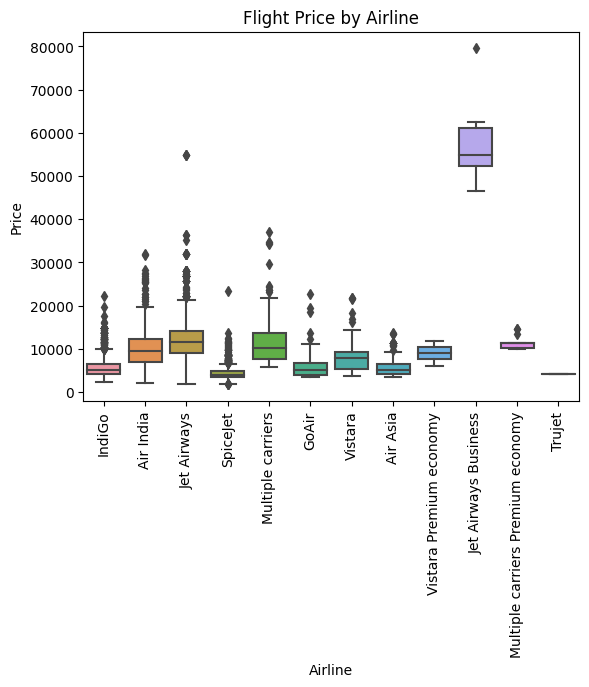

In [17]:
# Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
# airlines.
# Ans
import pandas as pd
import seaborn as sns


df = pd.read_excel('flight_price.xlsx')

df = df.dropna(subset=['Price', 'Airline'])

sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Price by Airline')
plt.xticks(rotation=90)
plt.show()


# Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.
 Ans:Yes there are outliers in the dataset.
 ## insights and Observation
 Based on the boxplot of flight prices, there seem to be some potential outliers in the dataset. Outliers are data points that lie outside the range of typical values and may skew the distribution of data.

Outliers can have a significant impact on statistical analysis, as they may affect measures of central tendency such as the mean and median, as well as measures of variability such as the standard deviation and range. For example, if we were to calculate the mean price of flights including the outliers, the resulting value may not accurately represent the typical price of flights, as the outliers may pull the mean in one direction or another. Similarly, the standard deviation of the prices may be larger if the outliers are included, which may indicate more variability than is actually present in the typical prices.

Therefore, it is important to carefully consider the presence of outliers and decide whether to exclude them or investigate them further in our analysis. One approach is to use a statistical test, such as the Tukey method, to identify and remove outliers. Another approach is to examine the data and determine whether the outliers are legitimate values or errors in data entry, and to decide whether to keep or remove them based on this assessment.


# Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?
Ans:
To identify the peak travel season from the Flight Price dataset, we would need to analyze the following features:

1-Date of travel: We would need to look at the distribution of flight prices across different months and days of the week. Typically, prices tend to be higher during peak travel season, which could help us identify the months and days of the week that are most popular for travel.

2-Destination: We would need to look at the prices of flights to different destinations, as prices may vary depending on the time of year and popularity of the destination.

3-Airline: We would need to look at the prices of flights offered by different airlines, as prices may vary depending on the airline and their pricing strategy.

4-Departure airport: We would need to look at the prices of flights departing from different airports, as prices may vary depending on the location and popularity of the airport.

C:\Users\user\AppData\Local\Temp\ipykernel_102420\1195751657.py:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date_of_travel'] = pd.to_datetime(df['Date_of_Journey'])


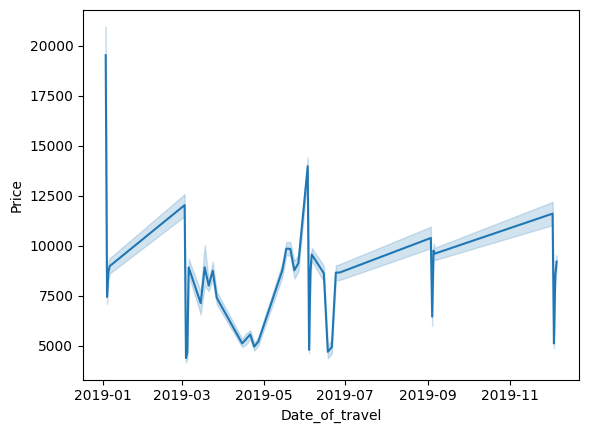

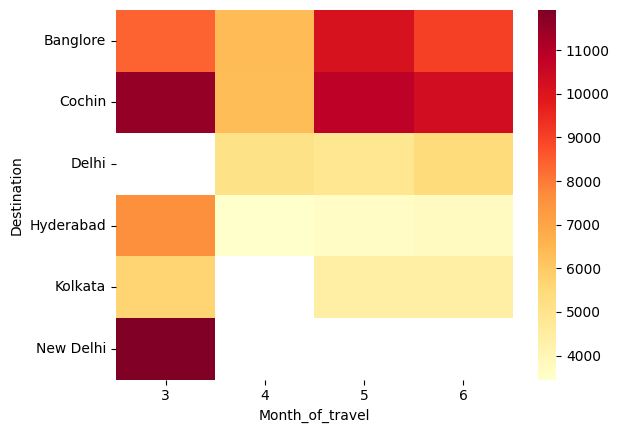

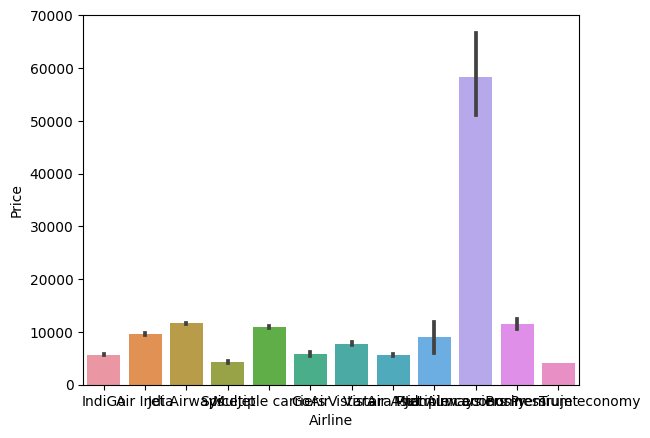

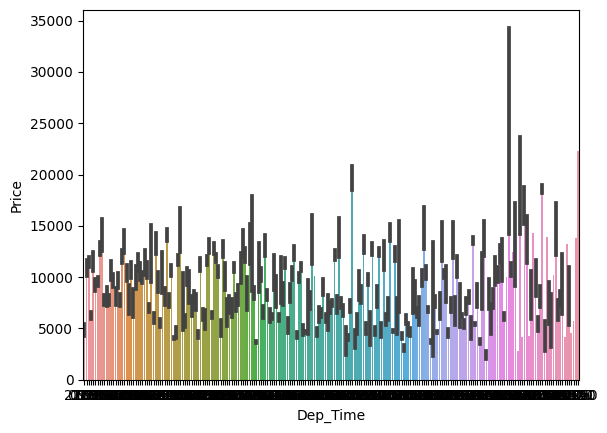

In [30]:
#code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('flight_price.xlsx')


df['Date_of_travel'] = pd.to_datetime(df['Date_of_Journey'])

df['Month_of_travel'] = df['Date_of_Journey'].str.split("/").str[1]
df["Month_of_travel"] =df["Month_of_travel"].astype(int)

sns.lineplot(x='Date_of_travel', y='Price', data=df)
plt.show()

sns.heatmap(df.groupby(['Destination', 'Month_of_travel'])['Price'].mean().unstack(), cmap='YlOrRd')
plt.show()

sns.barplot(x='Airline', y='Price', data=df)
plt.show()


sns.barplot(x='Dep_Time', y='Price', data=df)
plt.show()



C:\Users\user\AppData\Local\Temp\ipykernel_102420\3125981329.py:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['year'] = pd.to_datetime(df['Date_of_Journey']).dt.year
C:\Users\user\AppData\Local\Temp\ipykernel_102420\3125981329.py:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['month'] = pd.to_datetime(df['Date_of_Journey']).dt.month
C:\Users\user\AppData\Local\Temp\ipykernel_102420\3125981329.py:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['day_of_week'] = pd.to_datetime(df['Date_of_Journey']).dt.dayofweek


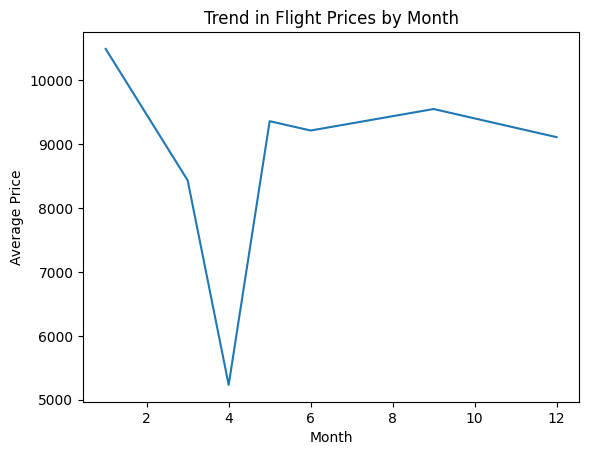

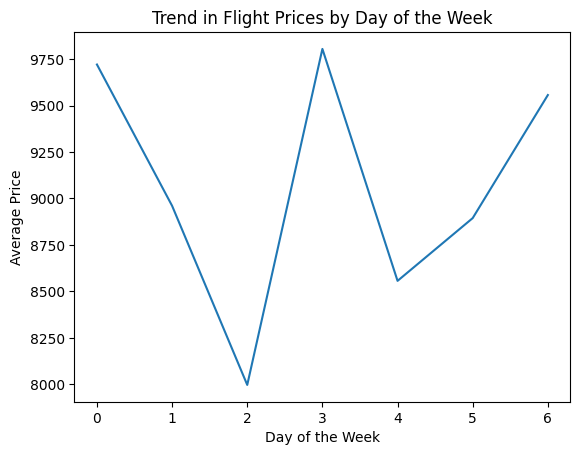

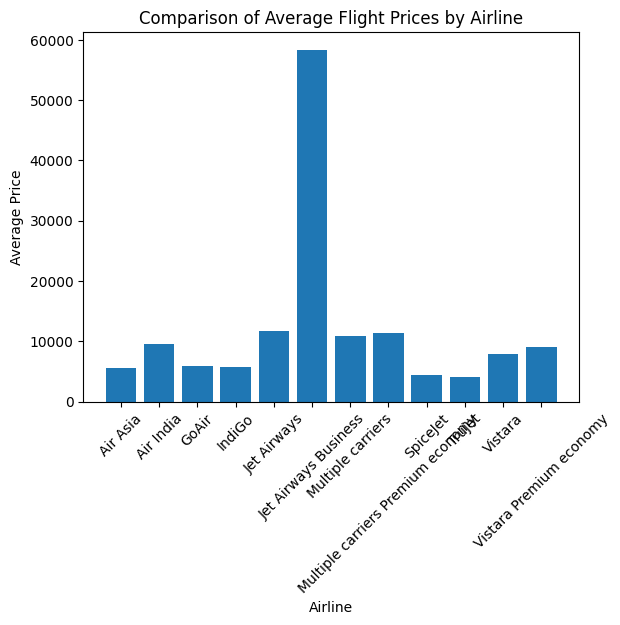

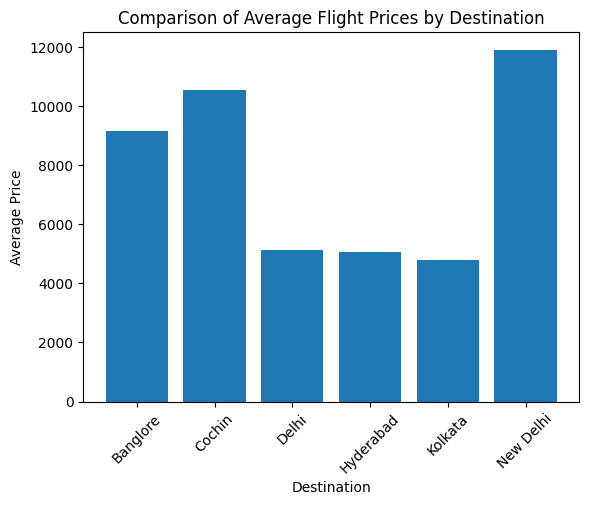

ValueError: invalid literal for int() with base 10: '5m'

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('flight_price.xlsx')

df['year'] = pd.to_datetime(df['Date_of_Journey']).dt.year
df['month'] = pd.to_datetime(df['Date_of_Journey']).dt.month
df['day_of_week'] = pd.to_datetime(df['Date_of_Journey']).dt.dayofweek


avg_price_by_month = df.groupby('month')['Price'].mean()

plt.plot(avg_price_by_month)
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Trend in Flight Prices by Month')
plt.show()

avg_price_by_day = df.groupby('day_of_week')['Price'].mean()

plt.plot(avg_price_by_day)
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')
plt.title('Trend in Flight Prices by Day of the Week')
plt.show()

avg_price_by_airline = df.groupby('Airline')['Price'].mean()

plt.bar(avg_price_by_airline.index, avg_price_by_airline.values)
plt.xticks(rotation=45)
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.title('Comparison of Average Flight Prices by Airline')
plt.show()

avg_price_by_destination = df.groupby('Destination')['Price'].mean()

plt.bar(avg_price_by_destination.index, avg_price_by_destination.values)
plt.xticks(rotation=45)
plt.xlabel('Destination')
plt.ylabel('Average Price')
plt.title('Comparison of Average Flight Prices by Destination')
plt.show()

df['Duration_hours'] =df["Duration"].str.split("h").str[0]
df["Duration_hours"].replace("5m",np.nan)
df["Duration_hours"]=df["Duration_hours"].astype(int)
# df['Duration_minutes'] =df["Duration"].str.split("m").str[0]
# df["Duration_minutes"]=df["Duration"].astype(int)

# avg_price_by_duration = df.groupby('Duration_hours')['Price'].mean()

# plt.scatter(avg_price_by_duration.index, avg_price_by_duration.values)
# plt.xlabel('Duration of Travel (hours)')
# plt.ylabel('Average Price')
# plt.title('Relationship between Flight Prices and Duration of Travel')
# plt.show()


